In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#first let's read in the file that we got from the WorldBank API

data = pd.read_csv('C:/Users/Ben/OneDrive - BYU Office 365/Desktop/BYU Fall 2022/Stat 386/Webscraping Tutorial/World-Bank-Tutorial/wbdata.csv')


In [3]:
data.head()

,economy,series,YR2010,YR2011,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020
0,ABW,DT.ODA.ODAT.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ABW,NY.GDP.PCAP.CD,24134.473859,25849.964006,25496.843942,26442.426801,26895.057167,28399.050131,28453.715565,29348.418969,30253.714235,31135.884356,23384.298791
2,ABW,SE.ADT.LITR.ZS,96.822639,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.807419,NaN,NaN
3,ABW,SM.POP.REFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ABW,SM.POP.REFG.OR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1596 entries, 0 to 1595
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   economy  1596 non-null   object 
 1   series   1596 non-null   object 
 2   YR2010   1222 non-null   float64
 3   YR2011   1234 non-null   float64
 4   YR2012   1216 non-null   float64
 5   YR2013   1212 non-null   float64
 6   YR2014   1236 non-null   float64
 7   YR2015   1220 non-null   float64
 8   YR2016   1208 non-null   float64
 9   YR2017   1205 non-null   float64
 10  YR2018   1245 non-null   float64
 11  YR2019   1191 non-null   float64
 12  YR2020   1152 non-null   float64
dtypes: float64(11), object(2)
memory usage: 162.2+ KB


In [5]:
#let's put this into long format

df = pd.melt(data, id_vars=['economy','series'], var_name='year', value_name='value')

#id_vars='religion', var_name = 'income', value_name = 'count'

df.head()

,economy,series,year,value
0,ABW,DT.ODA.ODAT.CD,YR2010,NaN
1,ABW,NY.GDP.PCAP.CD,YR2010,24134.473859
2,ABW,SE.ADT.LITR.ZS,YR2010,96.822639
3,ABW,SM.POP.REFG,YR2010,NaN
4,ABW,SM.POP.REFG.OR,YR2010,NaN


In [6]:
#remove the YR from the year column

df['year'] = df['year'].str.replace('YR','', regex=False)

df.head()

,economy,series,year,value
0,ABW,DT.ODA.ODAT.CD,2010,NaN
1,ABW,NY.GDP.PCAP.CD,2010,24134.473859
2,ABW,SE.ADT.LITR.ZS,2010,96.822639
3,ABW,SM.POP.REFG,2010,NaN
4,ABW,SM.POP.REFG.OR,2010,NaN


In [7]:
#I also want to make each series it's own column

df = pd.pivot(df, index=['economy','year'], columns='series', values='value')
#df.head()
#st_new = pd.pivot(st, index = 'date', columns = 'symbol', values='open')
df = df.reset_index()
df.head()

series,economy,year,DT.ODA.ODAT.CD,NY.GDP.PCAP.CD,SE.ADT.LITR.ZS,SM.POP.REFG,SM.POP.REFG.OR,SP.DYN.LE00.IN
0,ABW,2010,NaN,24134.473859,96.822639,NaN,NaN,75.017
1,ABW,2011,NaN,25849.964006,NaN,NaN,NaN,75.158
2,ABW,2012,NaN,25496.843942,NaN,NaN,NaN,75.299
3,ABW,2013,NaN,26442.426801,NaN,NaN,NaN,75.441
4,ABW,2014,NaN,26895.057167,NaN,NaN,NaN,75.583


In [8]:
#let's rename the columns

df = df.rename(columns={"DT.ODA.ODAT.CD":"AssistReceived", "NY.GDP.PCAP.CD":"GDPperCapita","SE.ADT.LITR.ZS":"AdultLitRate",
                                        "SP.DYN.LE00.IN":"LifeExpectancy","SM.POP.REFG.OR":"RefugeeOrigin","SM.POP.REFG":"RefugeeAsylum"})

# df.rename(columns={"A": "a", "B": "c"})
df.head()

series,economy,year,AssistReceived,GDPperCapita,AdultLitRate,RefugeeAsylum,RefugeeOrigin,LifeExpectancy
0,ABW,2010,NaN,24134.473859,96.822639,NaN,NaN,75.017
1,ABW,2011,NaN,25849.964006,NaN,NaN,NaN,75.158
2,ABW,2012,NaN,25496.843942,NaN,NaN,NaN,75.299
3,ABW,2013,NaN,26442.426801,NaN,NaN,NaN,75.441
4,ABW,2014,NaN,26895.057167,NaN,NaN,NaN,75.583


In [9]:
#now this is something we can work with

#one of the first things I want to do is look at how many missing values there are

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2926 entries, 0 to 2925
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   economy         2926 non-null   object 
 1   year            2926 non-null   object 
 2   AssistReceived  2009 non-null   float64
 3   GDPperCapita    2824 non-null   float64
 4   AdultLitRate    898 non-null    float64
 5   RefugeeAsylum   2330 non-null   float64
 6   RefugeeOrigin   2551 non-null   float64
 7   LifeExpectancy  2729 non-null   float64
dtypes: float64(6), object(2)
memory usage: 183.0+ KB


In [10]:
#count the missing values of each column
df.isna().sum()

series
economy              0
year                 0
AssistReceived     917
GDPperCapita       102
AdultLitRate      2028
RefugeeAsylum      596
RefugeeOrigin      375
LifeExpectancy     197
dtype: int64

In [11]:
len(df)

#it looks like most of the literacy rate values are null

2926

In [12]:
dfLitYear = pd.DataFrame(df.groupby('year')['AdultLitRate'].mean())
#will exclude NAs from result
dfLitYear = dfLitYear.reset_index()
dfLitYear.head()

#df1Complete.groupby('country')["lifeExpectancy"].mean()

,year,AdultLitRate
0,2010,81.281090
1,2011,84.021326
2,2012,80.603617
3,2013,81.942072
4,2014,83.049986


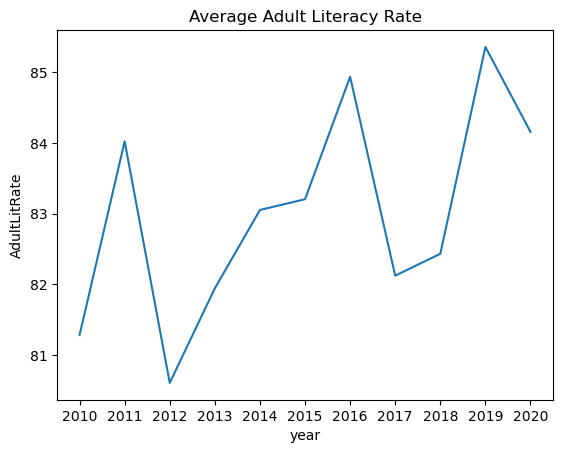

In [51]:
sns.lineplot(data = dfLitYear, x = 'year', y = 'AdultLitRate').set(title = "Average Adult Literacy Rate");

In [14]:
dfLitEcon = pd.DataFrame(df.groupby('economy')['AdultLitRate'].mean())
dfLitEcon = dfLitEcon.reset_index()

dfLitEcon.head()

,economy,AdultLitRate
0,ABW,97.315029
1,AFE,NaN
2,AFG,31.448851
3,AFW,NaN
4,AGO,66.030113


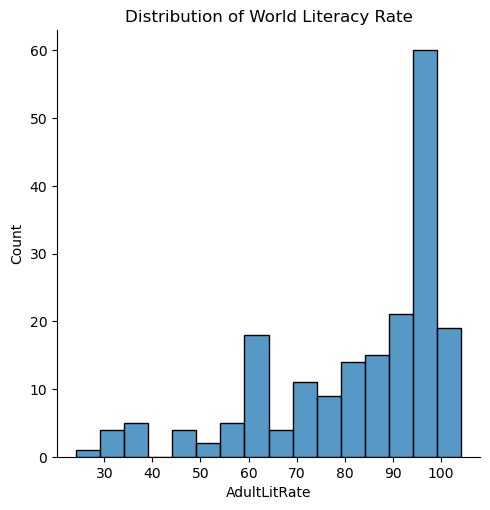

In [52]:
sns.displot(data = dfLitEcon, x = 'AdultLitRate', binwidth = 5).set(title = "Distribution of World Literacy Rate");

#once again, we have too many null values to know how accurate this really is

In [16]:
df.head()

series,economy,year,AssistReceived,GDPperCapita,AdultLitRate,RefugeeAsylum,RefugeeOrigin,LifeExpectancy
0,ABW,2010,NaN,24134.473859,96.822639,NaN,NaN,75.017
1,ABW,2011,NaN,25849.964006,NaN,NaN,NaN,75.158
2,ABW,2012,NaN,25496.843942,NaN,NaN,NaN,75.299
3,ABW,2013,NaN,26442.426801,NaN,NaN,NaN,75.441
4,ABW,2014,NaN,26895.057167,NaN,NaN,NaN,75.583


In [17]:
#let's take a look at GDP per capita and life expectancy, let's take the average over 5 years

dfGdpLe = pd.DataFrame(df.groupby('economy')[['GDPperCapita','LifeExpectancy']].mean())
dfGdpLe = dfGdpLe.reset_index()
dfGdpLe.head()

series,economy,GDPperCapita,LifeExpectancy
0,ABW,27253.986165,75.725455
1,AFE,1616.164526,61.898520
2,AFG,553.925155,63.262545
3,AFW,1841.716999,56.442151
4,AGO,3338.169088,58.987636


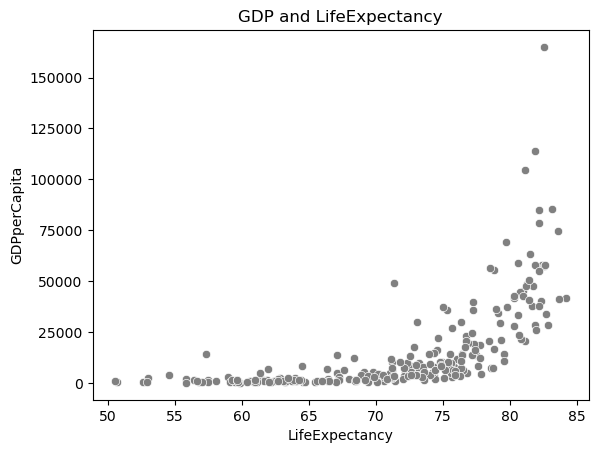

In [54]:
sns.scatterplot(data = dfGdpLe, x = 'LifeExpectancy', y = 'GDPperCapita', color = 'gray').set(title = "GDP and LifeExpectancy");

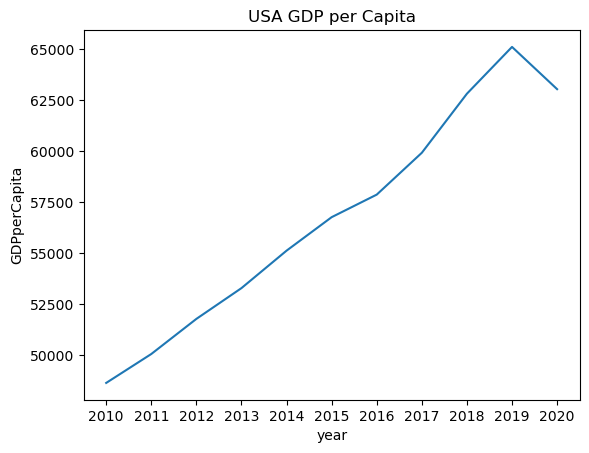

In [49]:
#let's focus on the USA a bit

sns.lineplot(data = df[df['economy'] == 'USA'], x = 'year', y = 'GDPperCapita').set(title = "USA GDP per Capita");

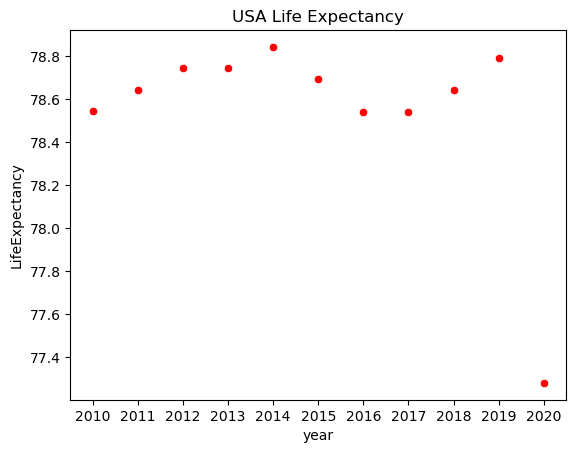

In [55]:
#let's look at a scatterplot of GDP per Capita and life expectancy

sns.scatterplot(data = df[df['economy'] == 'USA'], x = 'year', y = 'LifeExpectancy', color = 'red').set(title = "USA Life Expectancy");

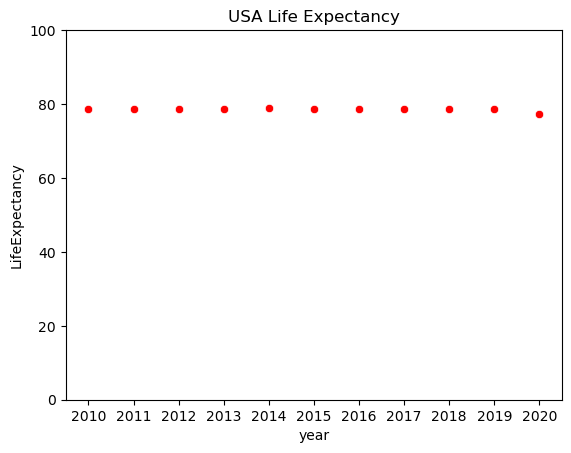

In [56]:
# plot distplot
fig, ax = plt.subplots()
sns.scatterplot(data = df[df['economy'] == 'USA'], x = 'year', y = 'LifeExpectancy', ax = ax, color = 'red').set(title = "USA Life Expectancy")
 
# change the limits of X-axis
ax.set_ylim(0, 100)
plt.show()

In [22]:
#^The Y-axis makes all the difference!

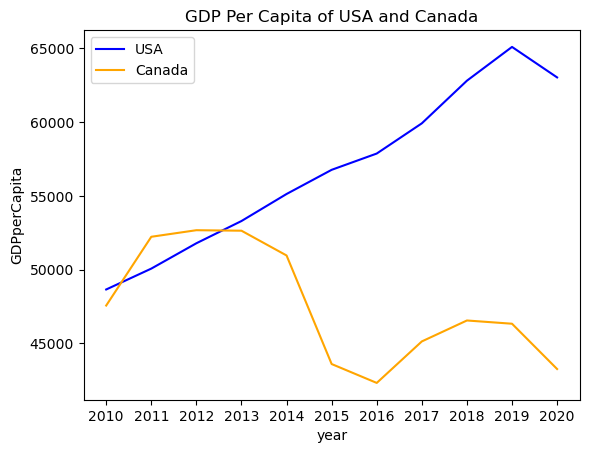

In [45]:
#Let's take a look at Canada and the USA

fig, ax = plt.subplots()

ax = sns.lineplot(data = df[df['economy'] == 'USA'], x = 'year', y = 'GDPperCapita', color = 'blue')
ax1 = sns.lineplot(data = df[df['economy'] == 'CAN'], x = 'year', y = 'GDPperCapita', color = 'orange').set(title = "GDP Per Capita of USA and Canada")

plt.legend(labels=['USA', 'Canada']);

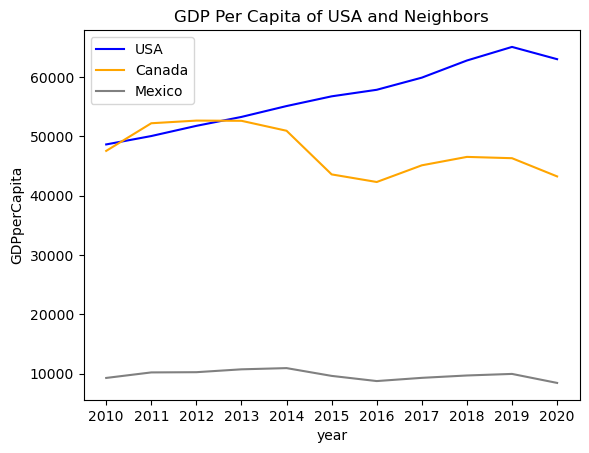

In [46]:
#What if we wanted to see USA, Canada, and Mexico

#Let's take a look at Canada and the USA

fig, ax = plt.subplots()

ax = sns.lineplot(data = df[df['economy'] == 'USA'], x = 'year', y = 'GDPperCapita', color = 'blue')
ax1 = sns.lineplot(data = df[df['economy'] == 'CAN'], x = 'year', y = 'GDPperCapita', color = 'orange')
ax2 = sns.lineplot(data = df[df['economy'] == 'MEX'], x = 'year', y = 'GDPperCapita', color = 'gray').set(title = "GDP Per Capita of USA and Neighbors")

plt.legend(labels=['USA', 'Canada', 'Mexico'])


In [65]:
#Refugees seeking asylum

dfRAYear = pd.DataFrame(df.groupby('year')['RefugeeAsylum'].mean())
#will exclude NAs from result
dfRAYear = dfRAYear.reset_index()


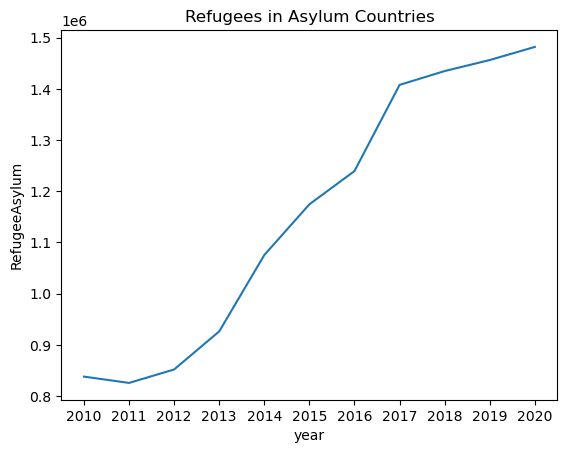

In [66]:
sns.lineplot(data = dfRAYear, x = 'year', y = 'RefugeeAsylum').set(title = "Refugees in Asylum Countries");